<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-MBD-EN2022S-ELECTIVES-3/blob/main/ir_practice/Information%20Retrieval%20Practice%20Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [1]:
repository_name = "NLP-MBD-EN2022S-ELECTIVES-3"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [2]:
! git clone $repository_url

Cloning into 'NLP-MBD-EN2022S-ELECTIVES-3'...
remote: Enumerating objects: 4445, done.
remote: Counting objects: 100% (4445/4445), done.
remote: Compressing objects: 100% (4351/4351), done.
remote: Total 4445 (delta 139), reused 4327 (delta 68), pack-reused 0
Receiving objects: 100% (4445/4445), 11.57 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (139/139), done.


Install the requirements (be aware that it could take a while)

In [3]:
! pip3 install -Uqqr $repository_name/ir_practice/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.8/393.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.7 MB/s eta 0:00:00


Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

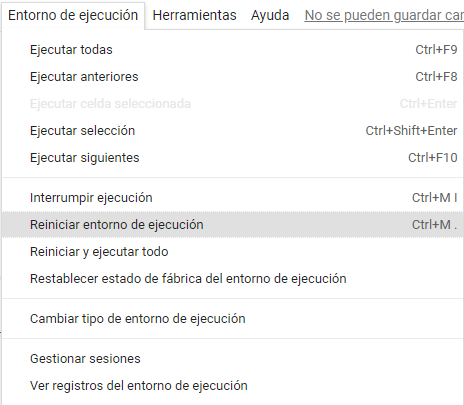

Now you have everything you need to execute the code in Colab

# Information Retrieval Practice

Elasticsearch is an open-source distributed search server built on top of Apache Lucene. It’s a great tool that allows to quickly build applications with full-text search capabilities. The core implementation is in Java, but it provides a nice REST interface which allows to interact with Elasticsearch from any programming language.


## Install Elastic Search

The ElasticSearch installation is pretty straightforward. First, we need to download and extract the package

In [4]:
!wget https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.15.0-linux-x86_64.tar.gz
!tar -xzf elasticsearch-7.15.0-linux-x86_64.tar.gz


--2023-06-06 10:26:05--  https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.15.0-linux-x86_64.tar.gz
Resolving artifacts.elastic.co (artifacts.elastic.co)... 34.120.127.130, 2600:1901:0:1d7::
Connecting to artifacts.elastic.co (artifacts.elastic.co)|34.120.127.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349270587 (333M) [application/x-gzip]
Saving to: ‘elasticsearch-7.15.0-linux-x86_64.tar.gz’

elasticsearch-7.15. 100%[===================>] 333.09M  18.8MB/s    in 19s     

2023-06-06 10:26:24 (17.6 MB/s) - ‘elasticsearch-7.15.0-linux-x86_64.tar.gz’ saved [349270587/349270587]



Now we need to install some additional packages that are required

In [5]:
!apt-get install openjdk-11-jre-headless -qq > /dev/null

Then we need to ensure that Colab can execute ElastiSearch

In [6]:
! sudo chown -R daemon:daemon elasticsearch-7.15.0/

Now we can execute the ElasticSearch binary. This will launch a local ElasticSearch server that is listening for petitions in the 9200 port

In [7]:
%%bash --bg

sudo -H -u daemon elasticsearch-7.15.0/bin/elasticsearch


We need to wait around 30 seconds to give time to ElasticSearch to open the server. After that we can validate that ElasticSearch is running and listening petitions in the expected port

In [8]:
%%bash

ps -ef | grep elasticsearch

root         675     673  0 10:26 ?        00:00:00 sudo -H -u daemon elasticsearch-7.15.0/bin/elasticsearch
daemon       676     675 62 10:26 ?        00:00:08 /content/elasticsearch-7.15.0/jdk/bin/java -Xshare:auto -Des.networkaddress.cache.ttl=60 -Des.networkaddress.cache.negative.ttl=10 -XX:+AlwaysPreTouch -Xss1m -Djava.awt.headless=true -Dfile.encoding=UTF-8 -Djna.nosys=true -XX:-OmitStackTraceInFastThrow -XX:+ShowCodeDetailsInExceptionMessages -Dio.netty.noUnsafe=true -Dio.netty.noKeySetOptimization=true -Dio.netty.recycler.maxCapacityPerThread=0 -Dio.netty.allocator.numDirectArenas=0 -Dlog4j.shutdownHookEnabled=false -Dlog4j2.disable.jmx=true -Djava.locale.providers=SPI,COMPAT --add-opens=java.base/java.io=ALL-UNNAMED -XX:+UseG1GC -Djava.io.tmpdir=/tmp/elasticsearch-16215354108173999208 -XX:+HeapDumpOnOutOfMemoryError -XX:HeapDumpPath=data -XX:ErrorFile=logs/hs_err_pid%p.log -Xlog:gc*,gc+age=trace,safepoint:file=logs/gc.log:utctime,pid,tags:filecount=32,filesize=64m -Xms6491m -X

In [11]:
%%bash

curl -sX GET "localhost:9200/"

{
  "name" : "05e798726775",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "fzOosYmiR4WM0odYx2iuRw",
  "version" : {
    "number" : "7.15.0",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "79d65f6e357953a5b3cbcc5e2c7c21073d89aa29",
    "build_date" : "2021-09-16T03:05:29.143308416Z",
    "build_snapshot" : false,
    "lucene_version" : "8.9.0",
    "minimum_wire_compatibility_version" : "6.8.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


## Querying Elastic Search via Python

To make queries to ElasticSearch you can directly query the server endpoint via REST. However, we can make it easier via the the `elasticsearch-py` Python library. This library provides a wrapper for the REST endpoint that will allow us to query the server form Python.

In case you have not yet installed the libraries, you can execute the following code

In [12]:
! pip install elasticsearch-dsl
! pip install elasticsearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: elasticsearch
    Found existing installation: elasticsearch 8.8.0
    Uninstalling elasticsearch-8.8.0:
      Successfully uninstalled elasticsearch-8.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import warnings
warnings.filterwarnings('ignore')

from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q, Index
from pprint import pprint

# Exercise 0: Indexing and Searching Demo for ElasticSearch

Now it's time to run some demo program. In this practice, we will create inverted index of sample documents (indexing) and then use Elasticsearch query grammar to search documents (searching).

### Useful functions

Functions to facilitate the reading of the dataset

In [14]:
import os, io
from collections import namedtuple

Doc = namedtuple('Doc', 'filename path text')

def read_doc(doc_path, encoding):
    '''
        reads a document from path
        input:
            - doc_path : path of document
            - encoding: encoding
        output: =>
            - doc: instance of Doc namedtuple
    '''
    filename = doc_path.split('/')[-1]
    fp = io.open(doc_path, 'r', encoding = encoding)
    text = fp.read().strip()
    fp.close()
    return Doc(filename = filename, text = text, path = doc_path)

def read_dataset(path, encoding = "ISO-8859-1"):
    '''
        reads multiple documents from path
        input:
            - doc_path : path of document
            - encoding: encoding
        output: =>
            - docs: instances of Doc namedtuple returned as generator
    '''
    for root, dirs, files in os.walk(path):
        for doc_path in files:
            yield read_doc(root + '/' + doc_path, encoding)

Setting up the connector

 To index the documents, we first need to make a connection to **Elasticsearch**. 

In [15]:
es_conn = Elasticsearch(["http://localhost:9200"])

if es_conn.ping():
    print("ElasticSearch is running")
else:
    print("ElasticSearch is not running")

ElasticSearch is running


## Indexing

We will try to index the sample documents in `./sample_documents`.

Before we index the documents, we first need to define the **configuration of elasticsearch**. During this process, you can define basic configuration of indexer such as tokenizer, stemmer, lemmatizer, and also define which search algorithm elasticsearch will use for search.

Below code shows a simple configuration settings for this demo.
The configuration tells elasticsearch that our document `doc` will have three fields `filename`, `path`, and `text`, and we will use `text` field for search. `my_analyzer` will be used to parse the `text` field, and `my_analyzer` will also be used as a search analyzer, which will parse search queries later on. `index:False` in `filename` and `path` fields tell elasticsearch that we will not index these two fields, therefore, we cannot search these two fields with queries. 

The detailed documentation of analyzer can be found [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis.html).

`"similarity": "boolean"` in `text` field will let elasticsearch know that we will use a boolean search algorithm to search `text` field. The detailed documentation of search algorithms can be found [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/search.html)  and [here](https://www.elastic.co/guide/en/elasticsearch/guide/master/search-in-depth.html). 


In [16]:
# configuration for indexing
settings = {
  "mappings": {
      "properties": {
        "filename": {
          "type": "keyword",
          "index": False,
        },
        "path": {
          "type": "keyword",
          "index": False,
        },
        "text": {
          "type": "text",
          "similarity": "boolean",
          "analyzer": "my_analyzer",
          "search_analyzer": "my_analyzer"
        }
      }
  },    
  "settings": {      
    "analysis": {
      "analyzer": {
        "my_analyzer": {
          "filter": [
            "lowercase","stop"
          ],
          "type": "custom",
          "tokenizer": "whitespace",
          "char_filter": ["my_char_filter"]
        }
      },
      "char_filter": {
        "my_char_filter": {
          "type": "html_strip",
          "escaped_tags": ["b"]
        }
      }
    }
  }
}

Now we will retrieve `sample documents` and indexing them into `INDEX_NAME` index. To that end, the following 2 functions will help you in the creation of the index and the indexing of the documents.


In [26]:
ES_HOSTS = ['http://localhost:9200']
INDEX_NAME = 'sample_index'
DOCS_PATH = repository_name + '/ir_practice/practice_data/sample_documents'

def create_index(es_conn, index_name, settings):
    '''
        create index structure in elasticsearch server. 
        If index_name exists in the server, it will be removed, and new index will be created.
        input:
            - es_conn: elasticsearch connection object
            - index_name: name of index to create
            - settings: settings and mappings for index to create
        output: =>
            - None
    '''
    if es_conn.indices.exists(index_name):
        es_conn.indices.delete(index = index_name)
        print('index `{}` deleted'.format(index_name))
    es_conn.indices.create(index = index_name, body = settings)
    print('index `{}` created'.format(index_name))            
            
def build_index(es_conn, dataset, index_name, settings, DOC_TYPE='doc'):
    '''
        build index from a collection of documents
        input:
            - es_conn: elasticsearch connection object
            - dataset: iterable, collection of namedtuple Doc objects
            - index_name: name of the index where the documents will be stored
            - DOC_TYPE: type signature of documents
    '''
    # create the index if it doesn't exist
    create_index(es_conn = es_conn, index_name = index_name, settings=settings)
    counter_read, counter_idx_failed = 0, 0 # counters

    # retrive & index documents
    for doc in dataset:
        res = es_conn.index(
            index = index_name,
            id = doc.filename,
            body = doc._asdict())
        counter_read += 1

        if res['result'] != 'created':
            conter_idx_failed += 1
        elif counter_read % 500 == 0:
            print('indexed {} documents'.format(counter_read))

    print('indexed {} docs to index `{}`, failed to index {} docs'.format(
        counter_read,
        index_name,
        counter_idx_failed
    ))
    
    # refresh after indexing
    es_conn.indices.refresh(index=index_name)  



In [27]:
dataset = read_dataset(DOCS_PATH)
build_index(es_conn, dataset, INDEX_NAME, settings)

index `sample_index` deleted
index `sample_index` created
indexed 5 docs to index `sample_index`, failed to index 0 docs


We successfully created an inverted index for the sample documents in `./sample/documents`. It's time to search the documents with some queries.

## Searching

### Full-Text Search

The two most important aspects of full-text search are as follows:

##### Relevance

>The ability to rank results by how relevant they are to the given query, whether relevance is calculated using TF/IDF (see [What Is Relevance?](https://www.elastic.co/guide/en/elasticsearch/guide/master/relevance-intro.html)), proximity to a geolocation, fuzzy similarity, or some other algorithm.

##### Analysis

>The process of converting a block of text into distinct, normalized tokens (see [Analysis and Analyzers](https://www.elastic.co/guide/en/elasticsearch/guide/master/analysis-intro.html) in order to (a) create an inverted index and (b) query the inverted index.

#### Term-Based Versus Full-Text

Two types of text query:

##### Term-based

Queries like the term or fuzzy queries are low-level queries that have no analysis phase. They operate on a single term. A term query for the term Foo looks for that exact term in the inverted index and calculates the TF/IDF relevance _score for each document that contains the term.

##### Full-text queries

Queries like the match or query_string queries are high-level queries that understand the mapping of a field:

* If you use them to query a date or integer field, they will treat the query string as a date or integer, respectively.

* If you query an exact value (not_analyzed) string field, they will treat the whole query string as a single term.

* But if you query a full-text (analyzed) field, they will first pass the query string through the appropriate analyzer to produce the list of terms to be queried.

Once the query has assembled a list of terms, it executes the appropriate low-level query for each of these terms, and then combines their results to produce the final relevance score for each document.

#### The match Query

We will perform now different types of queries.

First, a query with a single term

In [28]:
s = Search(using=es_conn, index="sample_index")
s = s.query("match", text={"query": "obama"})
res = s.execute()

for hit in res:
    print(hit.filename, hit.text[:100], '... - Score:', hit.meta.score)
    print()

doc3.txt Joseph Robinette "Joe" Biden, Jr. (born November 20, 1942) is the 47th and current Vice President of ... - Score: 1.0

doc1.txt Barack Hussein Obama II (born August 4, 1961) is the 44th and current President of the United States ... - Score: 1.0

doc5.txt John Sidney McCain III (born August 29, 1936) is the senior United States Senator from Arizona. He w ... - Score: 1.0

doc2.txt Michelle LaVaughn Robinson Obama (born January 17, 1964) is the wife of the forty-fourth President o ... - Score: 1.0



#### Multiword Queries

Obviously, we can search on more than one word at a time:

In [29]:
s = Search(using=es_conn, index="sample_index")
s = s.query("match", text={"query":    "Obama Hillary"})
res = s.execute()

for hit in res:
    print(hit.filename, hit.text[:200], '... - Score:', hit.meta.score)
    print()

doc1.txt Barack Hussein Obama II (born August 4, 1961) is the 44th and current President of the United States, the first African American to hold the office. He served as the junior United States Senator from  ... - Score: 2.0

doc3.txt Joseph Robinette "Joe" Biden, Jr. (born November 20, 1942) is the 47th and current Vice President of the United States. He was a United States Senator from Delaware from January 3, 1973 until his resi ... - Score: 1.0

doc4.txt Hillary Diane Rodham Clinton (born October 26, 1947) is the 67th United States Secretary of State, serving within the administration of President Barack Obama. She was a United States Senate from New  ... - Score: 1.0

doc5.txt John Sidney McCain III (born August 29, 1936) is the senior United States Senator from Arizona. He was the Republican nominee for president in the 2008 United States election.

McCain followed his fat ... - Score: 1.0

doc2.txt Michelle LaVaughn Robinson Obama (born January 17, 1964) is the wife of the for

The important thing is: any document whose title field contains at least one of the specified terms will match the query. The more terms that match, the more relevant the document.

But what happens if I want both terms appearing in the document.

In [30]:
s = Search(using=es_conn, index="sample_index")
s = s.query("match", text={
    "query":    "Obama Hillary",
    "operator": "and"})
res = s.execute()

for hit in res:
    print(hit.filename, hit.text, '... - Score:', hit.meta.score)
    print()


doc1.txt Barack Hussein Obama II (born August 4, 1961) is the 44th and current President of the United States, the first African American to hold the office. He served as the junior United States Senator from Illinois from January 2005 until he resigned after his election to the presidency in November 2008.

Obama is a graduate of Columbia University and Harvard Law School, where he was the president of the Harvard Law Review. He was a community organizer in Chicago before earning his law degree. He worked as a civil rights attorney in Chicago and also taught constitutional law at the University of Chicago Law School from 1992 to 2004.

Obama served three terms in the Illinois Senate from 1997 to 2004. Following an unsuccessful bid for a seat in the U.S. House of Representatives in 2000, Obama ran for United States Senate in 2004. His victory, from a crowded field, in the March 2004 Democratic primary raised his visibility. His prime-time televised keynote address at the Democratic Nat

And now containing a term but NOT the other.

In [31]:
# Boolean Query "Obama BUT Hillary"
s = Search(using=es_conn, index="sample_index")
s = s.query("bool", 
            must = [Q('match', text="hillary")],
            must_not = [Q('match', text="obama")]
           )

res = s.execute()

for hit in res:
    print(hit.filename, hit.text[:100], '... - Score:', hit.meta.score)
    print()

doc4.txt Hillary Diane Rodham Clinton (born October 26, 1947) is the 67th United States Secretary of State, s ... - Score: 1.0



# Exercise 1: Evaluating Results

We will show how the retrieved result can be evaluated by **trec_eval** evaluation program.

**trec_eval** is the standard software for evaluating search engines with test collections.

First, we need to check the `government` folder which contains three things:

- A set of documents needed to be indexed, in the *documents* directory.
    
- A set of queries, also called 'topics', in *topics/gov.topics* file. The format of **.topic* file is "query_id query_terms". For example, the first line of 'air.topics' file is
    
    `1 mining gold silver coal`
    
    which means that the ID of query is *01* and the corresponding query is *mining gold silver coal*.

- A set of judgements, saying which documents are relevant for each query, in the *qrels/gov.qrels* file. The format of **.qrels* file is "query_id 0 document_name binary_relevance". For example, the first line of 'air.qrels' is
    
    `1 0 G00-00-0681214 0`
    
    which means that the document `G00-00-0681214` is not relevant to the given query id *01*. The binary relevance is *1* if the file is relevant to the query, otherwise *0*. Please ignore the second argument *0* as it is always *0*.

## Create new index

In the previous exercise, we have created the index (inverted-index) of five sample documents. In this one, you will create a new index with the documents in `government/documents` folder .

To build a new index, you first need to create a new index. Note that `EVAL_INDEX_NAME` should be changed in order to build separate index for the documents in `government/documents`.

After creating the new configuration file, now your job is to create the new index reusing the code in the previous exercise.

In [32]:
settings = {
  "mappings": {
      "properties": {
        "filename": {
          "type": "keyword",
          "index": False,
        },
        "path": {
          "type": "keyword",
          "index": False,
        },
        "text": {
          "type": "text",
          "similarity": "boolean",
          "analyzer": "my_analyzer",
          "search_analyzer": "my_analyzer"
        }
      }
  },    
  "settings": {      
    "analysis": {
      "analyzer": {
        "my_analyzer": {
          "filter": [
            "stop"
          ],
          "char_filter": [
            "html_strip"
          ],
          "type": "custom",
          "tokenizer": "whitespace"
        }
      }
    }
  }
}

### Exercise 1.1: Create the new index

You can reuse the previous code

In [33]:
EVAL_INDEX_NAME = 'government'
EVAL_DOCS_PATH = repository_name +'/ir_practice/practice_data/government/documents'

dataset = read_dataset(EVAL_DOCS_PATH)
build_index(es_conn, dataset, EVAL_INDEX_NAME, settings)

index `government` created
indexed 500 documents
indexed 1000 documents
indexed 1500 documents
indexed 2000 documents
indexed 2500 documents
indexed 3000 documents
indexed 3500 documents
indexed 4000 documents
indexed 4078 docs to index `government`, failed to index 0 docs


### Exercise 1.2. Read topics and produce result file

Read topics (queries) from a file (`government/topics/gov.topics`) and then search documents indexed by **Elasticsearch**. You may choose one of search algorithms.

Produce result file (e.g., *retrieved.txt*) according to **trec_eval** standard output format: 

`01 Q0 document1 0 1.23 my_IR_system1`

`01 Q0 document2 1 1.08 my_IR_system1`

where '01' is the query ID; ignore 'Q0'; 'documentX' is the name of the file; '0' (or '1' or some other integer number) is the rank of this result; '1.23' (or '1.08' or some other number) is the score of this result; and 'my_IR_system1' is the name for your retrieval system. In particular, note that the rank field will be ignored in **trec_eval**; internally ranks are assigned by sorting by the score field with ties broken deterministicly (using file name).

**Now here's your first job**

1. read `gov.topics` file line by line, 
2. send query to the elastic search
3. write output according the the output format described above

In [ ]:
# Your code here

### Exercise 1.3.  Evaluation

It's time to run the evaluation which compares the qrels file provided in *gov.qrels* with your result file.

TREC_EVAL is an initiative to evaluate the performance of your search engine. To evaluate your search result, you first need two sets of files: the retrieved result file and the ground truth file.
Let's say your retrieval result is saved at `retrieved.txt`, and the ground truth file is saved at `gov.qrels`. 

The TREC_EVAL evaluation tool is rather outdated and difficult to execute. For this reason, I will use the `pytrec_eval` library

In [ ]:
!pip install pytrec_eval


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pytrec_eval: filename=pytrec_eval-0.5-cp39-cp39-linux_x86_64.whl size=293189 sha256=40c0b35d511b2d975ec785f55dc2a4cc1f126154f6cad331da53bddd308ccf36
  Stored in directory: /root/.cache/pip/wheels/e9/91/35/6059501bca98e27e0b4f91ecaaff86c95ca7f4919ff22f0d54
Successfully built pytrec_eval


In [ ]:
import pytrec_eval

def load_qrels_file(file_name):
    qrels = {}
    with open(file_name, "r") as f:
        for line in f:
            query_id, _, doc_id, rel = line.strip().split()
            if query_id not in qrels:
                qrels[query_id] = {}
            qrels[query_id][doc_id] = int(rel)
    return qrels

def load_results_file(file_name):
    results = {}
    with open(file_name, "r") as f:
        for line in f:
            query_id, _, doc_id, _, score, _ = line.strip().split()
            if query_id not in results:
                results[query_id] = {}
            results[query_id][doc_id] = float(score)
    return results




In [ ]:
def evaluate(qrels_path, results_path):

  results_trec = load_results_file(results_path)
  qrels = load_qrels_file(qrels_path)

  metrics_to_compute = {
      'map', 'ndcg',
      'P_5', 'P_10', 'P_20', 'P_50', 'P_100',
      'recall_5', 'recall_10', 'recall_20', 'recall_50', 'recall_100'
  }

  evaluator = pytrec_eval.RelevanceEvaluator(qrels, metrics_to_compute)
  evaluation = evaluator.evaluate(results_trec)

  # Initialize the aggregated metrics dictionary
  aggregated_metrics = {metric: 0 for metric in metrics_to_compute}

  # Sum the metrics for all queries
  num_queries = 0
  for query_id, metrics in evaluation.items():
      num_queries += 1
      for metric, value in metrics.items():
          aggregated_metrics[metric] += value

  # Calculate the average of the metrics
  for metric, value in aggregated_metrics.items():
      aggregated_metrics[metric] /= num_queries

  # Calculate the total number of documents
  total_documents = sum(len(docs) for docs in qrels.values())

  # Calculate the total number of retrieved documents
  total_retrieved = sum(len(docs) for docs in results_trec.values())

  # Calculate the total number of relevant documents
  total_relevant = sum([sum(rel.values()) for rel in qrels.values()])

  # Calculate the total number of relevant documents retrieved
  total_ret_rel = sum([sum([rel.get(doc_id, 0) for doc_id in result]) for query_id, result in results_trec.items() for rel in qrels.values() if query_id in rel])

  print("Total number of documents")
  print(f"Retrieved: {total_retrieved}")
  print(f"Relevant: {total_relevant}")
  print(f"ret_rel: {total_ret_rel}")

  # Calculate F-measure and format the output
  print("Average precision (non-interpolated) for all rel docs(averaged over queries): {:.2f}".format(aggregated_metrics['map']))
  print("K\tPrecision\tRecall\t\tF1")

  cutoffs = [5, 10, 20, 50, 100]

  for cutoff in cutoffs:
      precision_key = f"P_{cutoff}"
      recall_key = f"recall_{cutoff}"
      precision = aggregated_metrics[precision_key]
      recall = aggregated_metrics[recall_key]
      f_measure = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
      print(f"{cutoff}\t{precision:.2f}\t\t{recall:.2f}\t\t{f_measure:.2f}")

  print("R-Precision (precision after R (= num_rel for a query) docs retrieved): {:.2f}".format(aggregated_metrics['recall_5']))
  print("ndcg over all queries: {:.2f}".format(aggregated_metrics['ndcg']))



In [ ]:
# Your code here

# Improving the index

The baseline retrieval that we have proposed before did offer a rather low performance. In order to improve it, we can tune the index setting to include some of the NLP processing that we have learned (e.g., stemming, stopwords, ...)-

To that end, review the documentation of analyzer [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis.html).



Although we could generate our own analyzers (as we did in the previous exercises with `my_analyzer`), Elasticsearch provides a set of predefined analyzers for the different languages. More information [here](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis-lang-analyzer.html).

In particular, we are going to use the `English Analyzer`

In addition, we can modify the index to use a more sophisticated similarity measure (e.g., `BM25`) than the binary similarity.

## Exercise 2.1 English Analyzer + BM25

Modify the settings to apply the `English Analyzer` and use the `BM25` similarity

In [ ]:
new_settings = {  
# Your code here
}

With this new settings we will create a new index, generate a new result file and evaluate it by means of the `trec_eval`

In [ ]:
ES_HOSTS = ['http://localhost:9200']
EVAL_INDEX_NAME = 'government'
EVAL_DOCS_PATH = repository_name + '/ir_practice/practice_data/government/documents'

es_conn = Elasticsearch(ES_HOSTS)
dataset = read_dataset(EVAL_DOCS_PATH)
build_index(es_conn, dataset, EVAL_INDEX_NAME, new_settings)

In [ ]:
output_file = open("improved_retrieved.txt","w+")

es_conn = Elasticsearch(ES_HOSTS)
for query_id, query in queries:
    res = search(query, es_conn, EVAL_INDEX_NAME)
    write_trec_file(query_id, res, output_file)

output_file.close()

In [ ]:
evaluate(repository_name + "/ir_practice/practice_data/government/qrels/gov.qrels","improved_retrieved.txt")

Total number of documents
Retrieved: 1362
Relevant: 35
ret_rel: 0
Average precision (non-interpolated) for all rel docs(averaged over queries): 0.35
K	Precision	Recall		F1
5	0.12		0.39		0.18
10	0.08		0.44		0.14
20	0.06		0.61		0.11
50	0.04		0.75		0.07
100	0.02		0.90		0.04
R-Precision (precision after R (= num_rel for a query) docs retrieved): 0.39
ndcg over all queries: 0.50
